In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
from glob import glob

In [ ]:
images_path = 'New_Images/'
images = glob(images_path+'*.jpg')
len(images)

1008

In [ ]:
images[:5]

['New_Images/wetfloor10.jpg',
 'New_Images/ATM11.jpg',
 'New_Images/music22.jpg',
 'New_Images/music11.jpg',
 'New_Images/stairsdown_13.jpg']

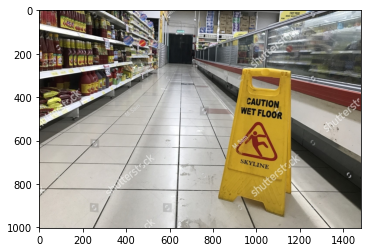

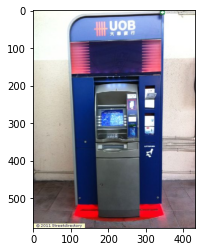

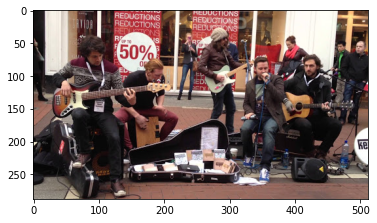

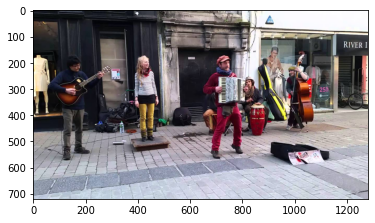

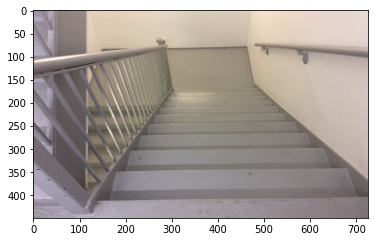

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [ ]:
from keras.applications import ResNet50

incept_model = ResNet50(include_top=True)

102973440/102967424 [==============================] - 1s 0us/step


In [ ]:
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)
        
    img_name = i.split('/')[-1]
    
    images_features[img_name] = pred
    
    count += 1
    
    if count > 1499:
        break
        
    elif count % 50 == 0:
        print(count)
    
        
    

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000


In [ ]:
len(images_features)

1008

# **Text Preprocess**

In [ ]:
caption_path = 'Descriptions_text2.txt'

In [ ]:
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [ ]:
len(captions)

2935

In [ ]:
captions

['ATM_queue1.jpg#0\t\tPeople are standing in queue outside Metrobank ATM.',
 'ATM_queue1.jpg#1\tThree people in the queue are wearing red tops.',
 'ATM_queue1.jpg#2\tThere is a huge planter adjacent to ATM with green plant in it.',
 'ATM_queue2.jpg#0\tThe ATM counters belong to the bank CHASE.',
 'ATM_queue2.jpg#1\tA lady in the queue is holding a pink umbrella.',
 'ATM_queue2.jpg#2\tPerson at one of the counters is carrying a red bag.',
 'ATM_queue3.jpg#0\tThere are two customers in the queue at the ATM counter.',
 'ATM_queue3.jpg#1\tThe customers in the queue are wearing white shirt.',
 'ATM_queue3.jpg#2\tThe ATM has a Rabbit picture on it.',
 'ATM_queue4.jpg#0\tThe ATM counter belongs to Bank of Ireland.',
 'ATM_queue4.jpg#1\tThe person at the counter is wearing a green shirt.',
 'ATM_queue4.jpg#2\tThe person waiting in the queue is carrying a backpack.',
 'ATM_queue5.jpg#0\tThere is a metal shade for the ATM counter.',
 'ATM_queue5.jpg#1\tThe first person in the queue at the counte

In [ ]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split('\t')[0][:-2] 
        caption = i.split('\t')[1]
        if img_name in images_features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]
                
            else:
                captions_dict[img_name].append(caption)
            
    except:
        pass

In [ ]:
len(captions_dict)

978

In [ ]:
captions_dict

{'ATM21.jpg': ['There is a pillar beside the ATM counter.',
  'A huge planter with green plants beside the ATM counter.',
  'The ATM belongs to us bank with tag line All of us serving you.'],
 'ATM22.jpg': ['ATM is of Royal Bank of Scotland.',
  'Tagline RBS Cash line is written on the ATM counter.',
  'ATM machine is grey in colour with blue background.'],
 'ATM23.jpg': ['ATM is of Royal Bank of Scotland.',
  'The ATM machine is fixed to a stone cladded wall.',
  'The ATM machine is majorly blue and grey in colour.'],
 'ATM24.jpg': ['The ATM is of Yorkshire Bank.',
  'ATM machine has a green inlet for cards.',
  'ATM machine has option of Free balance enquiries.'],
 'ATM25.jpg': ['The ATM is of NatWest Bank.',
  'ATM has mention of provision for Free cash withdrawals.',
  'ATM has mention of provision for mobile phone top up.'],
 'ATM26.jpg': ['The ATM is of NatWest Bank with Cash out tagline.',
  'ATM machine has a green inlet for cards.',
  'The ATM is fixed to a tiled wall.'],
 'AT

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img_name = images[i]
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)

In [ ]:
import matplotlib.pyplot as plt

for k in images_features.keys():
    plt.figure()
    
    img_name = 'Images/' + k
    
    
    img = cv2.imread(img_name)
    
   # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('/')[-1]])
    plt.imshow(img)
    
    break

In [ ]:

def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified
    

In [ ]:
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

In [ ]:
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:

                count_words[word] = 0

            else:
                count_words[word] += 1

In [ ]:
len(count_words)

1173

In [ ]:
THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1
        

In [ ]:
len(new_dict)

1173

In [ ]:
new_dict['<OUT>'] = len(new_dict) 

In [ ]:
captions_backup = captions_dict.copy()

In [ ]:
captions_dict = captions_backup.copy()

In [ ]:
for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():  
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])


        captions_dict[k][vv.index(v)] = encoded

In [ ]:
captions_dict

{'ATM21.jpg': [[1, 12, 13, 14, 62, 63, 6, 19, 40, 2],
  [1, 14, 15, 16, 20, 21, 148, 63, 6, 19, 40, 2],
  [1, 6, 19, 48, 18, 149, 26, 20, 150, 151, 65, 35, 149, 152, 153, 2]],
 'ATM22.jpg': [[1, 19, 13, 35, 154, 26, 35, 155, 2],
  [1, 156, 157, 123, 151, 13, 124, 46, 6, 19, 40, 2],
  [1, 19, 158, 13, 70, 5, 99, 20, 87, 159, 2]],
 'ATM23.jpg': [[1, 19, 13, 35, 154, 26, 35, 155, 2],
  [1, 6, 19, 158, 13, 61, 18, 14, 128, 129, 132, 2],
  [1, 6, 19, 158, 13, 69, 87, 71, 70, 5, 80, 2]],
 'ATM24.jpg': [[1, 6, 19, 13, 35, 160, 84, 2],
  [1, 19, 158, 43, 14, 21, 161, 54, 162, 2],
  [1, 19, 158, 43, 163, 35, 146, 164, 165, 2]],
 'ATM25.jpg': [[1, 6, 19, 13, 35, 166, 84, 2],
  [1, 19, 43, 167, 35, 168, 54, 146, 123, 169, 2],
  [1, 19, 43, 167, 35, 168, 54, 117, 170, 171, 172, 2]],
 'ATM26.jpg': [[1, 6, 19, 13, 35, 166, 26, 20, 123, 173, 174, 2],
  [1, 19, 158, 43, 14, 21, 161, 54, 162, 2],
  [1, 6, 19, 13, 61, 18, 14, 175, 132, 2]],
 'ATM27.jpg': [[1, 6, 19, 13, 35, 166, 26, 20, 123, 173, 174, 2

------------------------------------------------------------------------------------------------------

In [ ]:
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

In [ ]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)
            print(v)

[1, 2]
[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 2]
[1, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 5, 23, 2]
[1, 6, 55, 32, 5, 6, 7, 33, 6, 47, 13, 9, 14, 10, 56, 2]
[1, 6, 10, 329, 13, 5, 14, 345, 346, 92, 347, 8, 144, 302, 6, 348, 2]
[1, 6, 329, 33, 6, 329, 340, 13, 35, 6, 371, 341, 372, 71, 329, 341, 373, 2]
[1, 14, 28, 5, 70, 425, 71, 41, 109, 13, 5, 6, 7, 18, 387, 75, 6, 348, 2]
[1, 12, 8, 38, 604, 35, 4, 411, 18, 119, 560, 33, 6, 329, 340, 530, 50, 54, 14, 348, 2]


In [ ]:
MAX_LEN

21

In [ ]:
captions_dict

{'ATM21.jpg': [[1, 12, 13, 14, 62, 63, 6, 19, 40, 2],
  [1, 14, 15, 16, 20, 21, 148, 63, 6, 19, 40, 2],
  [1, 6, 19, 48, 18, 149, 26, 20, 150, 151, 65, 35, 149, 152, 153, 2]],
 'ATM22.jpg': [[1, 19, 13, 35, 154, 26, 35, 155, 2],
  [1, 156, 157, 123, 151, 13, 124, 46, 6, 19, 40, 2],
  [1, 19, 158, 13, 70, 5, 99, 20, 87, 159, 2]],
 'ATM23.jpg': [[1, 19, 13, 35, 154, 26, 35, 155, 2],
  [1, 6, 19, 158, 13, 61, 18, 14, 128, 129, 132, 2],
  [1, 6, 19, 158, 13, 69, 87, 71, 70, 5, 80, 2]],
 'ATM24.jpg': [[1, 6, 19, 13, 35, 160, 84, 2],
  [1, 19, 158, 43, 14, 21, 161, 54, 162, 2],
  [1, 19, 158, 43, 163, 35, 146, 164, 165, 2]],
 'ATM25.jpg': [[1, 6, 19, 13, 35, 166, 84, 2],
  [1, 19, 43, 167, 35, 168, 54, 146, 123, 169, 2],
  [1, 19, 43, 167, 35, 168, 54, 117, 170, 171, 172, 2]],
 'ATM26.jpg': [[1, 6, 19, 13, 35, 166, 26, 20, 123, 173, 174, 2],
  [1, 19, 158, 43, 14, 21, 161, 54, 162, 2],
  [1, 6, 19, 13, 61, 18, 14, 175, 132, 2]],
 'ATM27.jpg': [[1, 6, 19, 13, 35, 166, 26, 20, 123, 173, 174, 2

In [ ]:
Batch_size = 5000
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return X, y_in, y_out
    
    

In [ ]:
X, y_in, y_out = generator(images_features, captions_dict)

In [ ]:
len(X), len(y_in), len(y_out)

(25613, 25613, 25613)

In [ ]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')



In [ ]:
X.shape, y_in.shape, y_out.shape

((25613, 2048), (25613, 21), (25613, 1174))

In [ ]:
X[777]

array([0.11721916, 1.2704734 , 0.02437003, ..., 0.28558302, 0.44026044,
       1.7411208 ], dtype=float32)

In [ ]:
y_in[2]

array([1., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [ ]:

from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [ ]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(MAX_LEN))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=MAX_LEN))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 21, 128)           0         
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 21, 128)           150272    
_________________________________________________________________
lstm (LSTM)                  (None, 21, 256)           394240    
_________________________________________________________________
time_distributed (TimeDistri (None, 21, 128)           32896     
Total params: 577,408
Traina

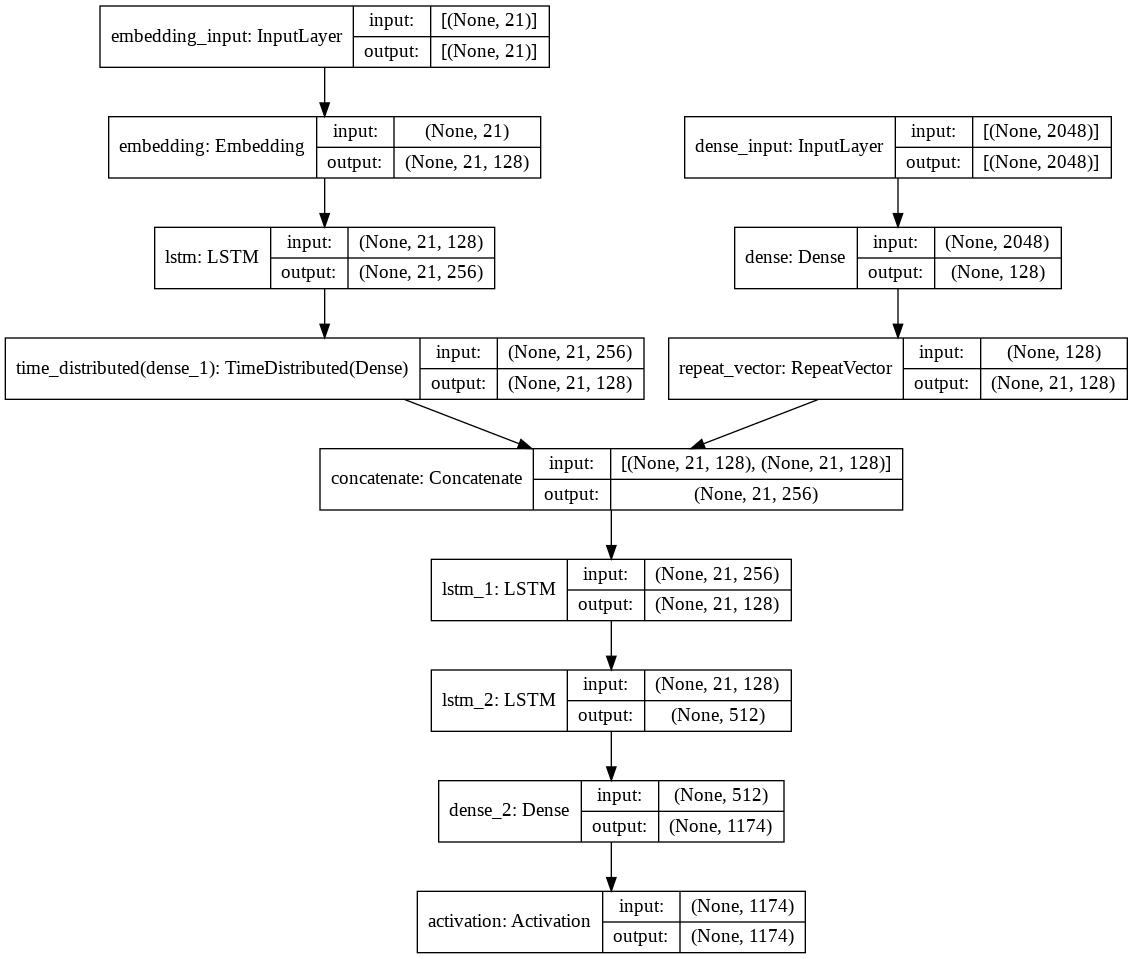

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
model.fit([X, y_in], y_out, batch_size=512, epochs=50)

Epoch 1/50
51/51 [==============================] - 135s 3s/step - loss: 5.3101 - accuracy: 0.0974
Epoch 2/50
51/51 [==============================] - 130s 3s/step - loss: 4.3769 - accuracy: 0.1640
Epoch 3/50
51/51 [==============================] - 130s 3s/step - loss: 3.9760 - accuracy: 0.1996
Epoch 4/50
51/51 [==============================] - 130s 3s/step - loss: 3.5895 - accuracy: 0.2453
Epoch 5/50
51/51 [==============================] - 130s 3s/step - loss: 3.2391 - accuracy: 0.2847
Epoch 6/50
51/51 [==============================] - 131s 3s/step - loss: 3.0497 - accuracy: 0.3043
Epoch 7/50
51/51 [==============================] - 130s 3s/step - loss: 2.7757 - accuracy: 0.3400
Epoch 8/50
51/51 [==============================] - 130s 3s/step - loss: 2.6304 - accuracy: 0.3590
Epoch 9/50
51/51 [==============================] - 130s 3s/step - loss: 2.4719 - accuracy: 0.3764
Epoch 10/50
51/51 [==============================] - 130s 3s/step - loss: 2.3080 - accuracy: 0.4207
Epoch 11/

In [ ]:
inv_dict = {v:k for k, v in new_dict.items()}

In [ ]:
model.save('model.h5')

In [ ]:
model.save_weights('mine_model_weights.h5')

In [ ]:
np.save('vocab.npy', new_dict)

In [ ]:
def getImage(x):
    
    test_img_path = '__57.jpeg'

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))
    
    return test_img

# **Predictions**

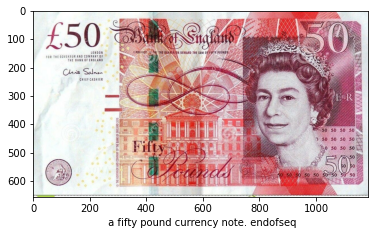

In [ ]:
for i in range(1):
    
    no = np.random.randint(1,900,(1,1))[0,0]
    test_feature = modele.predict(getImage(no)).reshape(1,2048)
    
    test_img_path = '__57.jpeg'
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=21)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        caption = caption + ' ' + sampled_word
            
        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)
        
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption)